In [9]:
import scipy.stats
import itertools
import numpy as np
import util
import d4j
import pandas as pd

def load(load_func):
    passing = None
    failing = None
    
    result = [{} for _ in range(6)]
    columns = ["cls_level", "method_level", "stmt_level"]
    for name in d4j.NAMES:
        data = load_func(name, None, "max20")
        if data is None:
            return None, None
        
        indices = data["is_bug"] == "True"
        failing = data.loc[indices, columns].reset_index(drop=True)
        passing = data.loc[~indices, columns].reset_index(drop=True)
        
        idx = 0
        for attr in columns:
            result[idx][name] = failing[attr]
            idx += 1
            result[idx][name] = passing[attr]
            idx += 1
            
    return [pd.DataFrame(x) for x in result]

pit = load(util.load_pit)
major = load(util.load)

/home/mingwan/irrelevant/py/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


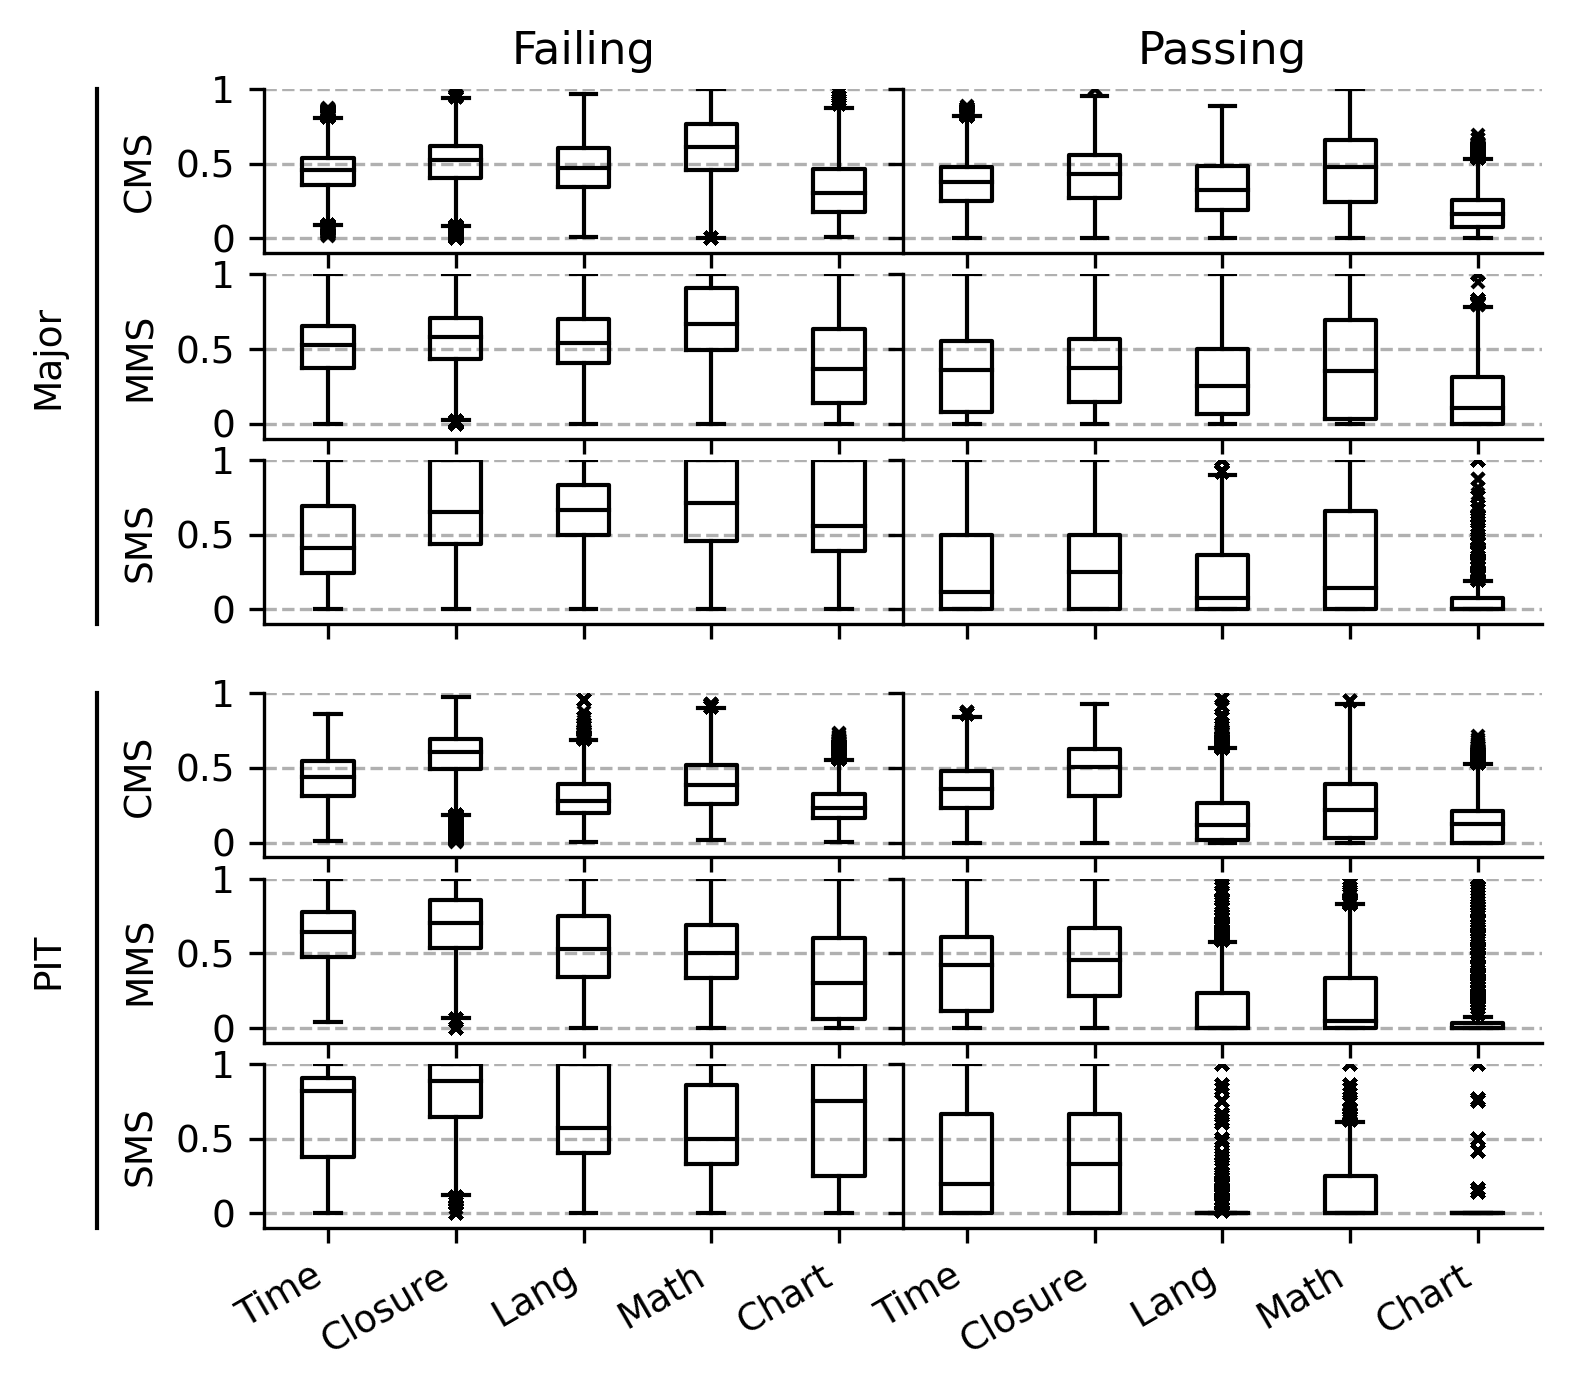

In [6]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 9}
matplotlib.rc('font', **font)


def draw(data, name, fig, outer, has_x):
    tcol = 3
    trow = 2
    idx = 0
    ylabels = ["CMS", "MMS", "SMS"]
   
    inner = outer.subgridspec(3, 2)
    titles = ["Failing", "Passing"]
    x_rep = []
    y_rep = []
    for idx in range(6):
        row = int(idx / 2)
        col = int(idx % 2)
        sharex = None if row == 0 else x_rep[col]
        sharey = None if col == 0 else y_rep[row]            
        axis = fig.add_subplot(inner[row, col], sharex=sharex, sharey=sharey)
        
        if not (has_x and row == 2):
            plt.setp(axis.get_xticklabels(), visible=False)

        if col != 0:
            plt.setp(axis.get_yticklabels(), visible=False)
            
#         if col == 0 and int(row % 3) == 0:
#             axis.set_title(" ")

        if sharex == None:
            x_rep.append(axis)

        if sharey == None:
            y_rep.append(axis)
        
        axis.set_ylim(-0.1, 1)        
        
        if col == 0:
            t = ylabels[row]
            axis.set_ylabel(t)
            
        if row == 0 and not has_x:
            t = titles[col]
            axis.set_title(t)

        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

        df = data[idx]
        df.boxplot(ax=axis, showfliers=True, medianprops=util.medianprops, widths=0.4, color=util.colorprops, boxprops=util.boxprops, flierprops=util.flierprops)

        plt.xticks(range(1, len(d4j.NAMES) + 1), d4j.NAMES, ha='right', rotation=30)
        plt.yticks([0, 0.5, 1], [0, 0.5, 1])
        axis.get_xaxis().grid(False)
        axis.get_yaxis().grid(True, linestyle='--')

fig = plt.figure(dpi=300, figsize=(5,4.7,))
fig.subplots_adjust(wspace=0, hspace=0)
outer = plt.GridSpec(2, 1, figure=fig)
outer.update(left=0.01)
aux1 = fig.add_subplot(outer[0])
aux1.set_ylabel("Major")
aux2 = fig.add_subplot(outer[1])
aux2.set_ylabel("PIT")
for ax in [aux1, aux2]:
    ax.tick_params(size=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_facecolor("none")
    for pos in ["right", "top", "bottom"]:
        ax.spines[pos].set_visible(False)
    ax.spines["left"].set_linewidth(1)
    ax.spines["left"].set_color("black")
    
outer = plt.GridSpec(2, 1, figure=fig)
draw(major, "Major", fig, outer[0], False)
draw(pit, "PIT", fig, outer[1], True)
plt.tight_layout()
plt.savefig('../seke/fig3.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
import scipy.stats

columns = ["cls_level", "method_level", "stmt_level"]
for x in [major, pit]:
    for idx, col_name in enumerate(columns):
        failing = x[idx * 2]
        passing = x[idx * 2 + 1]
        
        for proj_name in d4j.NAMES:
            print(proj_name, col_name, scipy.stats.ks_2samp(failing[proj_name], passing[proj_name]))

Time cls_level Ks_2sampResult(statistic=0.10284834290121467, pvalue=0.0)
Closure cls_level Ks_2sampResult(statistic=0.21094369943062058, pvalue=0.0)
Lang cls_level Ks_2sampResult(statistic=0.09218413440126744, pvalue=0.0)
Math cls_level Ks_2sampResult(statistic=0.09260773203990481, pvalue=0.0)
Chart cls_level Ks_2sampResult(statistic=0.19545471886299304, pvalue=0.0)
Time method_level Ks_2sampResult(statistic=0.10059964177787824, pvalue=0.0)
Closure method_level Ks_2sampResult(statistic=0.3266277119366894, pvalue=0.0)
Lang method_level Ks_2sampResult(statistic=0.12551883193744715, pvalue=0.0)
Math method_level Ks_2sampResult(statistic=0.15137788489581605, pvalue=0.0)
Chart method_level Ks_2sampResult(statistic=0.19545471886299304, pvalue=0.0)
Time stmt_level Ks_2sampResult(statistic=0.10059964177787824, pvalue=0.0)
Closure stmt_level Ks_2sampResult(statistic=0.4435344740944639, pvalue=0.0)
Lang stmt_level Ks_2sampResult(statistic=0.17554918574365636, pvalue=0.0)
Math stmt_level Ks_2samp